# This dataset contains the numbers for a type of incidents per month/year, per district and neiberhood

In [1]:
import pandas as pd
from googletrans import Translator

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import seaborn as sns
sns.set()

In [3]:
incidents_2015 = pd.read_excel('2015_incidents_gestionats_gub.xlsx')
incidents_2016 = pd.read_excel('2016_incidents_gestionats_gub.xlsx')
incidents_2017 = pd.read_csv('2017_incidents_gestionats_gub.csv')
incidents_2018 = pd.read_csv('2018_incidents_gestionats_gub.csv')

In [4]:
for incidents in (incidents_2015, incidents_2016, incidents_2017,incidents_2018):
    incidents =  incidents.append(incidents, ignore_index=True)

In [5]:
incidents.head()

,Codi_Incident,Descripcio_Incident,Codi_districte,Nom_districte,Codi_barri,Nom_barri,NK_Any,Mes_any,Nom_mes,Numero_incidents_GUB
0,680,"ALTRES ACTUACIONS DE S, C, ...",1,Ciutat Vella,1,el Raval,2018,5,Maig,116
1,400,CONVIVÈNCIA VEINAL ...,1,Ciutat Vella,2,el Barri Gòtic,2018,5,Maig,146
2,211,ACCIDENTS DE TRÀNSIT AMB FERITS ...,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2018,5,Maig,40
3,61,AVARIES DE SERVEIS PÚBLICS ...,3,Sants-Montjuïc,11,el Poble-sec,2018,5,Maig,10
4,222,INFRACCIONS EN MOVIMENT ...,9,Sant Andreu,63,Navas,2018,5,Maig,21


In [6]:
incidents.columns

Index(['Codi_Incident', 'Descripcio_Incident', 'Codi_districte',
       'Nom_districte', 'Codi_barri', 'Nom_barri', 'NK_Any', 'Mes_any',
       'Nom_mes', 'Numero_incidents_GUB'],
      dtype='object')

In [7]:
incidents.describe()

,Codi_districte,Codi_barri,NK_Any,Mes_any,Numero_incidents_GUB
count,69148.000000,69148.000000,69148.0,69148.000000,69148.000000
mean,5.868427,34.576069,2018.0,6.481460,10.510904
std,3.032999,22.328672,0.0,3.416235,21.255883
min,-1.000000,-1.000000,2018.0,1.000000,1.000000
25%,3.000000,15.000000,2018.0,4.000000,1.000000
50%,6.000000,32.000000,2018.0,6.000000,4.000000
75%,8.000000,55.000000,2018.0,9.000000,10.000000
max,10.000000,73.000000,2018.0,12.000000,529.000000


In [8]:
translator = Translator()

In [9]:
english_columns = [translator.translate(col).text.replace(' ', '_').lower() for col in incidents.columns]

In [10]:
incidents.columns = english_columns
incidents.head()

,código_acidente,description_incident,code_district,name_name,blank_code,name_name,nk_any,month_year,nom_mes,numero_incidents_gub
0,680,"ALTRES ACTUACIONS DE S, C, ...",1,Ciutat Vella,1,el Raval,2018,5,Maig,116
1,400,CONVIVÈNCIA VEINAL ...,1,Ciutat Vella,2,el Barri Gòtic,2018,5,Maig,146
2,211,ACCIDENTS DE TRÀNSIT AMB FERITS ...,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2018,5,Maig,40
3,61,AVARIES DE SERVEIS PÚBLICS ...,3,Sants-Montjuïc,11,el Poble-sec,2018,5,Maig,10
4,222,INFRACCIONS EN MOVIMENT ...,9,Sant Andreu,63,Navas,2018,5,Maig,21


In [11]:
#manually changing the one's that didn't work
incidents.columns = ['incident_code','description_incident','code_district','name_district','code_neighbourhood',
                    'name_neighbourhood','year_of_incident','month_year','month_name','number_incidents_gub']

In [12]:
incidents=incidents.set_index('incident_code')
incidents.sample()

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
411,VENDA AMBULANT ...,2,Eixample,7,la Dreta de l'Eixample,2018,6,Juny,147


In [13]:
incidents.description_incident.unique().size

93

In [14]:
incidents.description_incident = incidents.description_incident.str.strip()

In [15]:
##
##  TAKES LONG
##
translate_descriptions = [translator.translate(value, dest='es').text for value in incidents.description_incident.value_counts().index]
translate_descriptions = [translator.translate(value).text for value in translate_descriptions]

In [16]:
translate_descriptions

['OTHER ACTIONS OF S, C,',
 'ANNOYING ACTIVITIES IN PUBLIC SPACES',
 'ASSISTANCE TO PEOPLE IN PUBLIC SPACES',
 'neighborhood coexistence',
 'MOVEMENT INFRACTIONS',
 'POLICE SURVEILLANCE',
 'PARKING VIOLATIONS',
 'INFRACTIONS IN VADOS AND RESERVATIONS',
 'TRAFFIC ACCIDENTS WITH WOUNDED',
 'ACTS AGAINST PRIVATE PROPERTY',
 'INCIDENTS WITH ROAD AFFECTION',
 'INJURED TRAFFIC ACCIDENTS',
 'COLLABORATION WITH OTHER SERVICES',
 'COMPANY ANIMALS',
 'INCIDENTS WITH TRAFFIC HAZARD',
 'SUPPORTS',
 'OTHER INTERVENTIONS OF P, ADMINISTRATIVE',
 'FIRES',
 'ASSISTANCE TO PEOPLE IN BUILDING',
 'LOCAL INCIDENTS',
 'AUTOMATED SIGNALS',
 'ATTACKS',
 'TEMPORARY TRAFFIC RESTRICTIONS',
 'TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT',
 'FIRE / FIRE ALARMS',
 'DOMESTIC VIOLENCE',
 'PUBLIC SERVICE FAILURES',
 'VANDALISM',
 'NARCOTICS / psychotropic',
 'CONFLICTS IN LOCAL',
 'FIGHTS',
 'SCOPE OF PROTECTION OF THE MINOR',
 'MUNICIPAL SERVICES MALFUNCTIONS',
 'ANIMALS / DANGEROUS INSECTS',
 'ASSISTANCE DRIVERS IN V,

In [17]:
cat_to_en = dict(zip(incidents.description_incident.value_counts().index.tolist(), translate_descriptions))

In [18]:
len(cat_to_en)

93

In [19]:
rev_multidict = {}
for key, value in cat_to_en.items():
    rev_multidict.setdefault(value, set()).add(key)
len(rev_multidict)

92

In [20]:
cat_to_en

{'ALTRES ACTUACIONS DE S, C,': 'OTHER ACTIONS OF S, C,',
 'ACTIVITATS MOLESTES EN ESPAIS PÚBLICS': 'ANNOYING ACTIVITIES IN PUBLIC SPACES',
 'ASSISTÈNCIA A PERSONES EN ESPAIS PÚBLICS': 'ASSISTANCE TO PEOPLE IN PUBLIC SPACES',
 'CONVIVÈNCIA VEINAL': 'neighborhood coexistence',
 'INFRACCIONS EN MOVIMENT': 'MOVEMENT INFRACTIONS',
 'VIGILÀNCIA POLICIAL': 'POLICE SURVEILLANCE',
 'INFRACCIONS PER ESTACIONAMENTS': 'PARKING VIOLATIONS',
 'INFRACCIONS EN GUALS I RESERVES': 'INFRACTIONS IN VADOS AND RESERVATIONS',
 'ACCIDENTS DE TRÀNSIT AMB FERITS': 'TRAFFIC ACCIDENTS WITH WOUNDED',
 'ACTES CONTRA LA PROPIETAT PRIVADA': 'ACTS AGAINST PRIVATE PROPERTY',
 'INCIDÈNCIES AMB AFECTACIÓ DE VIA': 'INCIDENTS WITH ROAD AFFECTION',
 'ACCIDENTS DE TRÀNSIT SENSE FERITS': 'INJURED TRAFFIC ACCIDENTS',
 'COL·LABORACIÓ AMB ALTRES SERVEIS': 'COLLABORATION WITH OTHER SERVICES',
 'ANIMALS DE COMPANYIA': 'COMPANY ANIMALS',
 'INCIDÈNCIES AMB PERILL PEL TRÀNSIT': 'INCIDENTS WITH TRAFFIC HAZARD',
 'SUPORTS': 'SUPPORTS',

In [21]:
incidents.isnull().sum()

description_incident    0
code_district           0
name_district           0
code_neighbourhood      0
name_neighbourhood      0
year_of_incident        0
month_year              0
month_name              0
number_incidents_gub    0
dtype: int64

In [22]:
incidents.description_incident = incidents.description_incident.map(cat_to_en)

In [23]:
translate_month = [translator.translate(value, dest='es').text for value in incidents.month_name.value_counts().index]
translate_month = [translator.translate(value).text for value in translate_month]

In [24]:
translate_month

['June',
 'July',
 'October',
 'mayo',
 'September',
 'March',
 'April',
 'January',
 'August',
 'November',
 'February',
 'December']

In [25]:
translate_month[3] = 'May'

In [26]:
translate_month

['June',
 'July',
 'October',
 'May',
 'September',
 'March',
 'April',
 'January',
 'August',
 'November',
 'February',
 'December']

In [27]:
cat_to_en1 = dict(zip(incidents.month_name.value_counts().index.tolist(), translate_month))

In [28]:
cat_to_en1

{'Juny': 'June',
 'Juliol': 'July',
 'Octubre': 'October',
 'Maig': 'May',
 'Setembre': 'September',
 'Març': 'March',
 'Abril': 'April',
 'Gener': 'January',
 'Agost': 'August',
 'Novembre': 'November',
 'Febrer': 'February',
 'Desembre': 'December'}

In [29]:
incidents.month_name = incidents.month_name.map(cat_to_en1)

In [30]:
incidents

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
680,"OTHER ACTIONS OF S, C,",1,Ciutat Vella,1,el Raval,2018,5,May,116
400,neighborhood coexistence,1,Ciutat Vella,2,el Barri Gòtic,2018,5,May,146
211,TRAFFIC ACCIDENTS WITH WOUNDED,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2018,5,May,40
61,PUBLIC SERVICE FAILURES,3,Sants-Montjuïc,11,el Poble-sec,2018,5,May,10
222,MOVEMENT INFRACTIONS,9,Sant Andreu,63,Navas,2018,5,May,21
301,ASSISTANCE TO PEOPLE IN PUBLIC SPACES,4,Les Corts,19,les Corts,2018,5,May,29
500,MANIFESTATIONS / CONCENTRATIONS,1,Ciutat Vella,2,el Barri Gòtic,2018,5,May,48
470,"OTHER INTERVENTIONS OF P, ADMINISTRATIVE",1,Ciutat Vella,3,la Barceloneta,2018,5,May,17
211,TRAFFIC ACCIDENTS WITH WOUNDED,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,2018,5,May,12


In [31]:
incidents[(incidents.description_incident == 'LOCAL INCIDENTS') | (incidents.description_incident == 'CONFLICTS IN LOCAL') | (incidents.description_incident == 'INFRACTIONS IN LOCAL')]

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
420,LOCAL INCIDENTS,5,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,2018,5,May,7
513,CONFLICTS IN LOCAL,10,Sant Martí,64,el Camp de l'Arpa del Clot,2018,5,May,3
420,LOCAL INCIDENTS,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,2018,10,October,10
420,LOCAL INCIDENTS,10,Sant Martí,65,el Clot,2018,12,December,12
513,CONFLICTS IN LOCAL,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2018,12,December,10
420,LOCAL INCIDENTS,1,Ciutat Vella,3,la Barceloneta,2018,8,August,16
513,CONFLICTS IN LOCAL,8,Nou Barris,50,les Roquetes,2018,2,February,1
420,LOCAL INCIDENTS,8,Nou Barris,50,les Roquetes,2018,3,March,3
513,CONFLICTS IN LOCAL,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2018,3,March,3


In [32]:
incidents[(incidents.description_incident == 'CONFLICTS IN LOCAL') | (incidents.description_incident == 'INFRACTIONS IN LOCAL')]

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
513,CONFLICTS IN LOCAL,10,Sant Martí,64,el Camp de l'Arpa del Clot,2018,5,May,3
513,CONFLICTS IN LOCAL,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2018,12,December,10
513,CONFLICTS IN LOCAL,8,Nou Barris,50,les Roquetes,2018,2,February,1
513,CONFLICTS IN LOCAL,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,2018,3,March,3
421,INFRACTIONS IN LOCAL,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2018,3,March,1
513,CONFLICTS IN LOCAL,2,Eixample,5,el Fort Pienc,2018,10,October,6
513,CONFLICTS IN LOCAL,3,Sants-Montjuïc,15,Hostafrancs,2018,10,October,5
513,CONFLICTS IN LOCAL,10,Sant Martí,65,el Clot,2018,4,April,1
513,CONFLICTS IN LOCAL,2,Eixample,6,la Sagrada Família,2018,12,December,7


In [33]:
incidents[(incidents.description_incident == 'CONFLICTS IN LOCAL') | (incidents.description_incident == 'INFRACTIONS IN LOCAL')].description_incident = 'LOCAL INCIDENTS'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
incidents[(incidents.description_incident == 'FIGHTS')| (incidents.description_incident == 'ATTACKS')]

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
510,FIGHTS,2,Eixample,5,el Fort Pienc,2018,5,May,6
670,ATTACKS,9,Sant Andreu,57,la Trinitat Vella,2018,5,May,2
670,ATTACKS,5,Sarrià-Sant Gervasi,24,les Tres Torres,2018,8,August,1
510,FIGHTS,3,Sants-Montjuïc,16,la Bordeta,2018,8,August,1
510,FIGHTS,2,Eixample,7,la Dreta de l'Eixample,2018,11,November,8
510,FIGHTS,2,Eixample,7,la Dreta de l'Eixample,2018,3,March,11
670,ATTACKS,7,Horta-Guinardó,37,el Carmel,2018,3,March,6
510,FIGHTS,10,Sant Martí,71,Provençals del Poblenou,2018,3,March,1
50,ATTACKS,8,Nou Barris,45,Porta,2018,3,March,1


In [35]:
incidents.loc[(incidents.description_incident == 'FIGHTS')].description_incident = 'ATTACKS'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [36]:
incidents[(incidents.description_incident == 'FIGHTS')]

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
510,FIGHTS,2,Eixample,5,el Fort Pienc,2018,5,May,6
510,FIGHTS,3,Sants-Montjuïc,16,la Bordeta,2018,8,August,1
510,FIGHTS,2,Eixample,7,la Dreta de l'Eixample,2018,11,November,8
510,FIGHTS,2,Eixample,7,la Dreta de l'Eixample,2018,3,March,11
510,FIGHTS,10,Sant Martí,71,Provençals del Poblenou,2018,3,March,1
510,FIGHTS,6,Gràcia,31,la Vila de Gràcia,2018,4,April,5
510,FIGHTS,9,Sant Andreu,63,Navas,2018,1,January,1
510,FIGHTS,2,Eixample,7,la Dreta de l'Eixample,2018,1,January,9
510,FIGHTS,9,Sant Andreu,58,Baró de Viver,2018,1,January,1


In [37]:
incidents.loc[(incidents.description_incident == 'ACTS AGAINST PRIVATE PROPERTY') | (incidents.description_incident == 'ACTS AGAINST PUBLIC PROPERTY') | (incidents.description_incident == 'ACTS AGAINST THE PROPERTY')].description_incident = 'VANDALISM'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
incidents[(incidents.description_incident == 'ACTS AGAINST PRIVATE PROPERTY') | (incidents.description_incident == 'ACTS AGAINST PUBLIC PROPERTY') | (incidents.description_incident == 'ACTS AGAINST THE PROPERTY')]

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub
incident_code,,,,,,,,,
610,ACTS AGAINST PRIVATE PROPERTY,6,Gràcia,28,Vallcarca i els Penitents,2018,7,July,9
610,ACTS AGAINST PRIVATE PROPERTY,1,Ciutat Vella,3,la Barceloneta,2018,8,August,186
610,ACTS AGAINST PRIVATE PROPERTY,9,Sant Andreu,60,Sant Andreu,2018,8,August,8
610,ACTS AGAINST PRIVATE PROPERTY,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,2018,12,December,27
610,ACTS AGAINST PRIVATE PROPERTY,3,Sants-Montjuïc,14,la Font de la Guatlla,2018,11,November,5
610,ACTS AGAINST PRIVATE PROPERTY,3,Sants-Montjuïc,15,Hostafrancs,2018,2,February,31
610,ACTS AGAINST PRIVATE PROPERTY,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",2018,2,February,56
610,ACTS AGAINST PRIVATE PROPERTY,2,Eixample,6,la Sagrada Família,2018,2,February,32
610,ACTS AGAINST PRIVATE PROPERTY,8,Nou Barris,48,la Guineueta,2018,3,March,10


In [39]:
crime_df = pd.read_excel('C:\\Users\\user\\Documents\\Project\\Project_Criminalityfeature.xlsx')
crime_df

,high,medium,low,unknown
0,FIRES,ATTACKS,FIRE / FIRE ALARMS,POLICE SURVEILLANCE
1,EXPLOSIONS,NARCOTICS / psychotropic,ANNOYING ACTIVITIES IN PUBLIC SPACES,"OTHER INTERVENTIONS OF P, ADMINISTRATIVE"
2,DANGEROUS MATTERS,AGAINST SEXUAL FREEDOM,PARKING VIOLATIONS,PUBLIC SERVICE FAILURES
3,TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS,CRIMES AGAINST PUBLIC ORDER,DOMESTIC VIOLENCE,WASTE DISPOSAL
4,NaN,INCIDENTS WITH PRISONERS AND DETAINEES,OTHER INCIDENTS WITH ANIMALS,NON-AUTOMATED SIGNALS
5,NaN,URBAN TRIBES,FOGUERES / BARBECUES,OTHER ACTIONS IN THE ENVIRONMENT
6,NaN,LOCAL INCIDENTS,DISCOMFORTS BY GENERATORS,Strong winds
7,NaN,VANDALISM,ILLICIT OCCUPATIONS,ACCIDENT COMING FROM CME
8,NaN,TRAFFIC ACCIDENTS WITH WOUNDED,INFRACTIONS OF FOREIGNERS,CONDUCTIONS AND ACCOMPANIMENTS
9,NaN,INJURED TRAFFIC ACCIDENTS,ACTIVITY WITH PRISONERS,INMOVILIZACIONES / DESIMMOBILITZACIONS


In [40]:
incidents['crime_risk'] = ''

In [41]:
high = crime_df.high
high = high.dropna()
high

0                                         FIRES
1                                    EXPLOSIONS
2                             DANGEROUS MATTERS
3    TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS
Name: high, dtype: object

In [42]:
medium = crime_df.medium.dropna()
medium

0                                     ATTACKS
1                    NARCOTICS / psychotropic
2                      AGAINST SEXUAL FREEDOM
3                 CRIMES AGAINST PUBLIC ORDER
4      INCIDENTS WITH PRISONERS AND DETAINEES
5                                URBAN TRIBES
6                             LOCAL INCIDENTS
7                                   VANDALISM
8              TRAFFIC ACCIDENTS WITH WOUNDED
9                   INJURED TRAFFIC ACCIDENTS
10              INCIDENTS WITH TRAFFIC HAZARD
11              INCIDENTS WITH ROAD AFFECTION
12                                   PEDDLING
Name: medium, dtype: object

In [43]:
low = crime_df.low.dropna()
low

0                             FIRE / FIRE ALARMS
1           ANNOYING ACTIVITIES IN PUBLIC SPACES
2                             PARKING VIOLATIONS
3                              DOMESTIC VIOLENCE
4                   OTHER INCIDENTS WITH ANIMALS
5                           FOGUERES / BARBECUES
6                      DISCOMFORTS BY GENERATORS
7                            ILLICIT OCCUPATIONS
8                      INFRACTIONS OF FOREIGNERS
9                        ACTIVITY WITH PRISONERS
10                 AGAINST THE RIGHTS OF WORKERS
11             HUNTING / FISHING / FLORA / FAUNA
12                                       custody
13                                   FOOD CRIMES
14                TEMPORARY TRAFFIC RESTRICTIONS
15                              TRAFFIC CONTROLS
16    TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT
17               MOVEMENT INFRACTIONS (VEHICLES)
18                   ANIMALS / DANGEROUS INSECTS
19                  OCCUPATIONS OF PUBLIC SPACES
Name: low, dtype: ob

In [44]:
incidents.loc[ incidents['description_incident'] == 'FIRES', 'crime_risk'] = 'high'
incidents.loc[ incidents['description_incident'] == 'EXPLOSIONS', 'crime_risk'] = 'high'
incidents.loc[ incidents['description_incident'] == 'DANGEROUS MATTERS', 'crime_risk'] = 'high'
incidents.loc[ incidents['description_incident'] == 'TRAFFIC ACCIDENTS WITH PERILLOSSES MATTERS', 'crime_risk'] = 'high'

In [45]:
incidents.loc[ (incidents['description_incident'] == 'ATTACKS') |
        (incidents['description_incident'] == 'NARCOTICS / psychotropic') |
        (incidents['description_incident'] == 'AGAINST SEXUAL FREEDOM') |
        (incidents['description_incident'] == 'CRIMES AGAINST PUBLIC ORDER') |
        (incidents['description_incident'] == 'INCIDENTS WITH PRISONERS AND DETAINEES') |
        (incidents['description_incident'] == 'URBAN TRIBES') |
        (incidents['description_incident'] == 'LOCAL INCIDENTS') |
        (incidents['description_incident'] == 'VANDALISM') |
        (incidents['description_incident'] == 'TRAFFIC ACCIDENTS WITH WOUNDED') |
        (incidents['description_incident'] == 'INJURED TRAFFIC ACCIDENTS') |
        (incidents['description_incident'] == 'INCIDENTS WITH TRAFFIC HAZARD') , 'crime_risk'] = 'medium'

In [46]:
incidents.loc[(incidents['description_incident'] == 'FIRE / FIRE ALARMS') |
            (incidents['description_incident'] == 'ANNOYING ACTIVITIES IN PUBLIC SPACES') |
            (incidents['description_incident'] == 'PARKING VIOLATIONS') |
            (incidents['description_incident'] == 'DOMESTIC VIOLENCE') |          
            (incidents['description_incident'] == 'OTHER INCIDENTS WITH ANIMALS') |
            (incidents['description_incident'] == 'FOGUERES / BARBECUES') |
            (incidents['description_incident'] == 'DISCOMFORTS BY GENERATORS') |
            (incidents['description_incident'] == 'ILLICIT OCCUPATIONS') |                             
            (incidents['description_incident'] == 'INFRACTIONS OF FOREIGNERS') |
            (incidents['description_incident'] == 'ACTIVITY WITH PRISONERS') |
            (incidents['description_incident'] == 'AGAINST THE RIGHTS OF WORKERS') |
            (incidents['description_incident'] == 'HUNTING / FISHING / FLORA / FAUNA') |          
            (incidents['description_incident'] == 'custody') |
            (incidents['description_incident'] == 'FOOD CRIMES') |
            (incidents['description_incident'] == 'TEMPORARY TRAFFIC RESTRICTIONS') |
            (incidents['description_incident'] == 'TRAFFIC CONTROLS') |                              
            (incidents['description_incident'] == 'TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT') |
            (incidents['description_incident'] == 'MOVEMENT INFRACTIONS (VEHICLES)'), 'crime_risk'] = 'low'

In [47]:
incidents[(incidents.crime_risk == 'high') | (incidents.crime_risk == 'medium') | (incidents.crime_risk == 'low')].crime_risk.count()

25070

In [48]:
#Creating a new dataframe with only incidents that have been marked as High,Medium and Low -->> 25070 incidents
incidents_new = incidents[(incidents.crime_risk == 'high') | (incidents.crime_risk == 'medium') | (incidents.crime_risk == 'low')]

In [49]:
print('Low:',(len(incidents_new[incidents_new.crime_risk == 'low'])/len(incidents_new))*100)
print('-----------------------------')
print('Medium:',(len(incidents_new[incidents_new.crime_risk == 'medium'])/len(incidents_new))*100)
print('-----------------------------')
print('High:',(len(incidents_new[incidents_new.crime_risk == 'high'])/len(incidents_new))*100)

Low: 45.63222975668129
-----------------------------
Medium: 46.61348224970084
-----------------------------
High: 7.75428799361787


In [50]:
pd.crosstab(incidents_new.name_district,incidents_new.crime_risk)

crime_risk,high,low,medium
name_district,,,
Ciutat Vella,136,850,876
Desconegut,24,144,134
Eixample,212,1132,1252
Gràcia,134,770,752
Horta-Guinardó,242,1494,1398
Les Corts,92,548,520
Nou Barris,284,1620,1680
Sant Andreu,160,1058,1028
Sant Martí,264,1636,1754


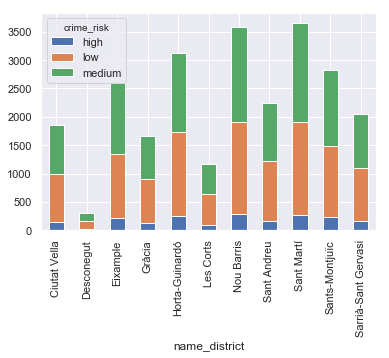

In [51]:
pd.crosstab(incidents_new.name_district,incidents_new.crime_risk).plot.bar(stacked=True);

In [52]:
pd.crosstab(incidents_new.name_neighbourhood,incidents_new.month_year)

month_year,1,2,3,4,5,6,7,8,9,10,11,12
name_neighbourhood,,,,,,,,,,,,
Baró de Viver,12,16,12,16,16,12,12,12,8,12,18,18
Can Baró,14,16,18,18,20,22,18,22,20,20,18,20
Can Peguera,18,14,20,14,14,14,12,14,12,16,6,10
Canyelles,20,20,14,22,20,18,28,20,22,24,14,16
Ciutat Meridiana,24,22,24,24,28,20,24,26,24,20,18,22
Desconegut,20,22,26,22,26,28,34,26,32,26,22,18
Diagonal Mar i el Front Marítim del Poblenou,28,30,26,32,36,32,36,30,28,30,30,34
Horta,30,32,32,36,38,34,34,30,34,38,34,34
Hostafrancs,28,32,28,34,30,36,30,32,28,32,24,28


In [53]:
incidents_new.groupby(by='name_neighbourhood')['number_incidents_gub'].sum()

name_neighbourhood
Baró de Viver                                     466
Can Baró                                          632
Can Peguera                                       382
Canyelles                                         940
Ciutat Meridiana                                  946
Desconegut                                       1134
Diagonal Mar i el Front Marítim del Poblenou     2770
Horta                                            3306
Hostafrancs                                      3024
Montbau                                          1090
Navas                                            1584
Pedralbes                                        2322
Porta                                            2198
Provençals del Poblenou                          2286
Sant Andreu                                      5384
Sant Antoni                                      5258
Sant Genís dels Agudells                         1032
Sant Gervasi - Galvany                           6534
Sant Gerv

In [54]:
incidents_new[incidents_new.name_district == 'Eixample']

,description_incident,code_district,name_district,code_neighbourhood,name_neighbourhood,year_of_incident,month_year,month_name,number_incidents_gub,crime_risk
incident_code,,,,,,,,,,
210,INJURED TRAFFIC ACCIDENTS,2,Eixample,5,el Fort Pienc,2018,7,July,17,medium
410,ANNOYING ACTIVITIES IN PUBLIC SPACES,2,Eixample,6,la Sagrada Família,2018,7,July,108,low
210,INJURED TRAFFIC ACCIDENTS,2,Eixample,8,l'Antiga Esquerra de l'Eixample,2018,7,July,38,medium
223,MOVEMENT INFRACTIONS (VEHICLES),2,Eixample,5,el Fort Pienc,2018,8,August,2,low
620,NARCOTICS / psychotropic,2,Eixample,5,el Fort Pienc,2018,7,July,2,medium
211,TRAFFIC ACCIDENTS WITH WOUNDED,2,Eixample,7,la Dreta de l'Eixample,2018,12,December,123,medium
0,FIRES,2,Eixample,5,el Fort Pienc,2018,2,February,5,high
410,ANNOYING ACTIVITIES IN PUBLIC SPACES,2,Eixample,7,la Dreta de l'Eixample,2018,10,October,126,low
230,TRANSFERS OF VEHICLES WITHOUT INFRINGEMENT,2,Eixample,10,Sant Antoni,2018,11,November,4,low


In [55]:
incidents_new[incidents_new.name_neighbourhood == 'Baró de Viver'][['month_year','number_incidents_gub']].sort_values(by='month_year').groupby(by='month_year').sum()

,number_incidents_gub
month_year,
1,34
2,32
3,16
4,48
5,48
6,50
7,52
8,34
9,24


In [56]:
incidents_new[['name_neighbourhood','month_year','number_incidents_gub']].sort_values(by='month_year').groupby(by=['name_neighbourhood','month_year']).sum()

number_incidents_gub
name_neighbourhood month_year                      
Baró de Viver      1                             34
                   2                             32
                   3                             16
                   4                             48
                   5                             48
                   6                             50
                   7                             52
                   8                             34
                   9                             24
                   10                            40
                   11                            46
                   12                            42
Can Baró           1                             52
                   2                             34
                   3                             32
                   4                             68
                   5                             58
                   6                             62
                   7                             46
                   8                             54
                   9                             62
                   10                            88
                   11                            34
                   12                            42
Can Peguera        1                             38
                   2                             24
                   3                             32
                   4                             26
                   5                             24
                   6                             50
...                                             ...
les Corts          7                            570
                   8                            342
                   9                            466
                   10                           536
                   11                           470
                   12                           456
les Roquetes       1                            110
                   2                             84
                   3                            126
                   4                             92
                   5                            120
                   6                            166
                   7                            140
                   8                            134
                   9                            124
                   10                            86
                   11                            90
                   12                           102
les Tres Torres    1                            134
                   2                            126
                   3                            126
                   4                            114
                   5                            128
                   6                            176
                   7                            132
                   8                             58
                   9                            182
                   10                           128
                   11                           122
                   12                           136

[888 rows x 1 columns]

In [57]:
#June,July has the highest number of incidents
incidents_new.groupby('month_year')['number_incidents_gub'].sum()

month_year
1     16454
2     15264
3     17620
4     18168
5     20344
6     24274
7     23972
8     17918
9     22094
10    20926
11    18024
12    17512
Name: number_incidents_gub, dtype: int64

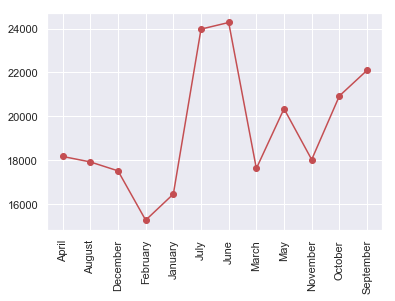

In [58]:
plt.plot(incidents_new.groupby('month_name')['number_incidents_gub'].sum(),'ro-')
plt.xticks(rotation=90);

In [59]:
safety_df = pd.DataFrame(pd.crosstab(incidents_new.name_neighbourhood,incidents_new.crime_risk))
safety_df.head()

crime_risk,high,low,medium
name_neighbourhood,,,
Baró de Viver,12,82,70
Can Baró,20,116,90
Can Peguera,8,90,66
Canyelles,16,106,116
Ciutat Meridiana,26,136,114


In [60]:
safety_df['tot_score'] = (safety_df['high'] * 3 ) + (safety_df['medium'] * 2) + (safety_df['low'] * 1)

In [61]:
print(safety_df.sort_values(by='tot_score',ascending=True))

crime_risk                                    high  low  medium  tot_score
name_neighbourhood                                                        
la Clota                                        12   56      42        176
Can Peguera                                      8   90      66        246
Baró de Viver                                   12   82      70        258
Vallbona                                        18   78      74        280
el Coll                                         16   96     102        348
Can Baró                                        20  116      90        356
Torre Baró                                      22  104     106        382
Canyelles                                       16  106     116        386
la Font d'en Fargues                            18  118     108        388
Vallvidrera, el Tibidabo i les Planes           20  126     116        418
la Teixonera                                    20  120     120        420
Verdun                   

In [67]:
population_df = pd.read_csv("C:\\Users\\user\\Documents\\Project\\2018_padro_ocupacio_mitjana.csv")
population_df.rename(columns={'Nom_Barri':'name_neighbourhood','Població':'population',
                             'Domicilis':'domicile',
                              'Ocupació mitjana (persones per domicili)':'average population per domicile'},inplace=True)

population_df.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,name_neighbourhood,population,domicile,average population per domicile
0,2018,1,Ciutat Vella,1,el Raval,47605,17212,2.77
1,2018,1,Ciutat Vella,2,el Barri Gòtic,17035,6565,2.59
2,2018,1,Ciutat Vella,3,la Barceloneta,14893,6917,2.15
3,2018,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22605,10238,2.21
4,2018,2,Eixample,5,el Fort Pienc,32080,12831,2.50


In [69]:
population_df.loc[[10],['name_neighbourhood']] = 'el Poble-sec'
#population_df[population_df.neighbourhood_name == 'el Poble Sec'].neighbourhood_name = 'el Poble-sec'
#to merge with the safety df

In [70]:
population_df.describe()

,Any,Codi_Districte,Codi_Barri,population,domicile,average population per domicile
count,73.0,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2018.0,6.246575,37.000000,22314.191781,9052.273973,2.512192
std,0.0,2.807633,21.217131,14639.428360,6150.289375,0.182485
min,2018.0,1.000000,1.000000,657.000000,272.000000,2.150000
25%,2018.0,4.000000,19.000000,10622.000000,4234.000000,2.410000
50%,2018.0,7.000000,37.000000,20766.000000,8206.000000,2.460000
75%,2018.0,8.000000,55.000000,30751.000000,12295.000000,2.550000
max,2018.0,10.000000,73.000000,58238.000000,24719.000000,3.000000


In [71]:
merged_df = safety_df.merge(population_df,on='name_neighbourhood',how = 'left').drop(['Any','Codi_Districte','Nom_Districte','Codi_Barri'],axis=1)

In [72]:
merged_df.head()

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59
1,Can Baró,20,116,90,356,9071.0,3832.0,2.37
2,Can Peguera,8,90,66,246,2229.0,925.0,2.41
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45
4,Ciutat Meridiana,26,136,114,442,10622.0,3669.0,2.90


In [73]:
#touristy neighbourhoods- premium .....to be added later update >> population - domicile- avg pop / domicile


##metric to find population

In [74]:
surface_area = pd.read_csv("C:\\Users\\user\\Documents\\Project\\2017_superficie.csv")
surface_area.rename(columns={'Nom_Barri':'name_neighbourhood','Superfície (ha)':'surface_area (ha)',
                             'Codi_Barri':'code_neighbourhood', 'Nom_Districte':'name_district',
                              'Codi_Districte':'code_district'},inplace=True)
surface_area.loc[[10],['name_neighbourhood']] = 'el Poble-sec'
surface_area.head()
#A hectare is a unit of area equal to 10,000 square meters.

,Any,code_district,name_district,code_neighbourhood,name_neighbourhood,surface_area (ha)
0,2017,1,Ciutat Vella,1,el Raval,109.8
1,2017,1,Ciutat Vella,2,el Barri Gòtic,84.2
2,2017,1,Ciutat Vella,3,la Barceloneta,131.4
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",111.4
4,2017,2,Eixample,5,el Fort Pienc,92.9


In [75]:
#merging the surface area 
merged_df = merged_df.merge(surface_area,on='name_neighbourhood',how = 'left').drop(['Any','code_district','name_district','code_neighbourhood'],axis=1)

In [76]:
merged_df.isna().sum() # because of Desconegut - this means unknown

name_neighbourhood                 0
high                               0
low                                0
medium                             0
tot_score                          0
population                         1
domicile                           1
average population per domicile    1
surface_area (ha)                  1
dtype: int64

In [77]:
merged_df.dtypes

name_neighbourhood                  object
high                                 int64
low                                  int64
medium                               int64
tot_score                            int64
population                         float64
domicile                           float64
average population per domicile    float64
surface_area (ha)                  float64
dtype: object

In [78]:
merged_df.head()

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha)
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59,23.0
1,Can Baró,20,116,90,356,9071.0,3832.0,2.37,38.4
2,Can Peguera,8,90,66,246,2229.0,925.0,2.41,12.0
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45,79.3
4,Ciutat Meridiana,26,136,114,442,10622.0,3669.0,2.90,35.5


In [79]:
#finding population per sq. hectare
merged_df['population/sa'] = merged_df['population']/merged_df['surface_area (ha)']
merged_df.head()

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59,23.0,110.217391
1,Can Baró,20,116,90,356,9071.0,3832.0,2.37,38.4,236.223958
2,Can Peguera,8,90,66,246,2229.0,925.0,2.41,12.0,185.750000
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45,79.3,86.822194
4,Ciutat Meridiana,26,136,114,442,10622.0,3669.0,2.90,35.5,299.211268


In [80]:
merged_df['overall_score'] = round((merged_df['tot_score'] * merged_df['population/sa'])/100,2)
merged_df.head()

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59,23.0,110.217391,284.36
1,Can Baró,20,116,90,356,9071.0,3832.0,2.37,38.4,236.223958,840.96
2,Can Peguera,8,90,66,246,2229.0,925.0,2.41,12.0,185.750000,456.94
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45,79.3,86.822194,335.13
4,Ciutat Meridiana,26,136,114,442,10622.0,3669.0,2.90,35.5,299.211268,1322.51


In [81]:
merged_df.sort_values(by='overall_score',ascending=True)

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score
57,la Marina del Prat Vermell,30,194,142,568,1161.0,462.0,2.51,1428.4,0.812798,4.62
27,"Vallvidrera, el Tibidabo i les Planes",20,126,116,418,4710.0,1605.0,2.93,1152.2,4.087832,17.09
24,Torre Baró,22,104,106,382,2893.0,964.0,3.00,176.8,16.363122,62.51
51,la Clota,12,56,42,176,657.0,272.0,2.42,17.8,36.910112,64.96
25,Vallbona,18,78,74,280,1400.0,489.0,2.86,59.8,23.411371,65.55
9,Montbau,20,130,122,434,5157.0,2139.0,2.41,204.7,25.192965,109.34
16,Sant Genís dels Agudells,14,130,138,448,7149.0,2930.0,2.44,171.6,41.660839,186.64
11,Pedralbes,30,188,150,578,12046.0,4234.0,2.85,270.2,44.581791,257.68
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59,23.0,110.217391,284.36
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45,79.3,86.822194,335.13


In [83]:
merged_df.to_csv("C:\\Users\\user\\Documents\\Project\\merged.csv")

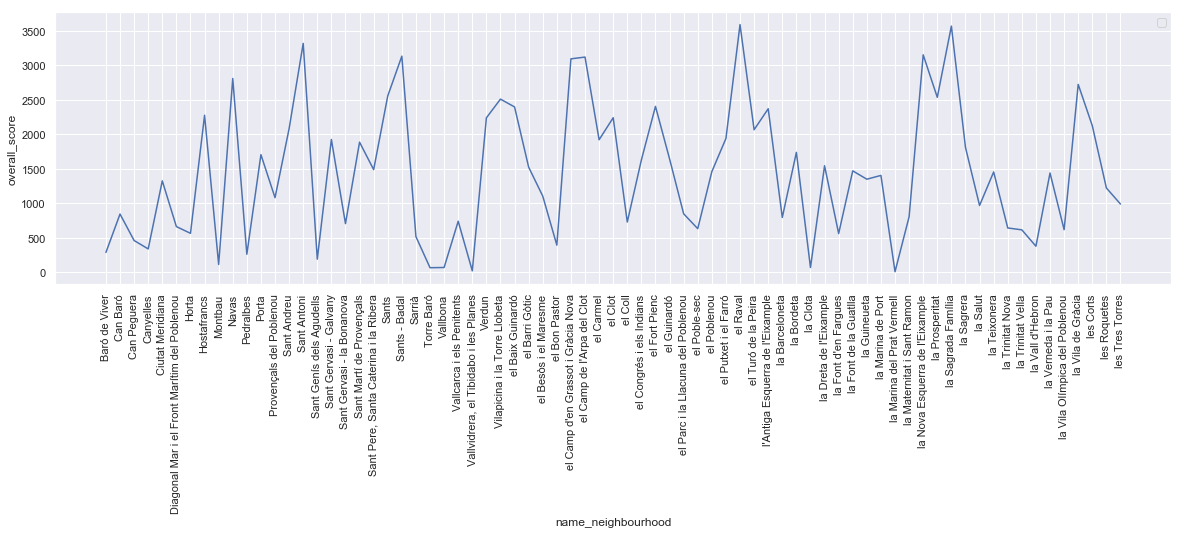

In [84]:
fig,ax = plt.subplots(figsize=(20,5))
ax.set(xlabel='name_neighbourhood', ylabel='count')
ax.legend(labels=["overall score scount"])
sns.lineplot(ax = ax, x = 'name_neighbourhood', y = 'overall_score', data = merged_df.dropna())
plt.xticks(rotation=90);

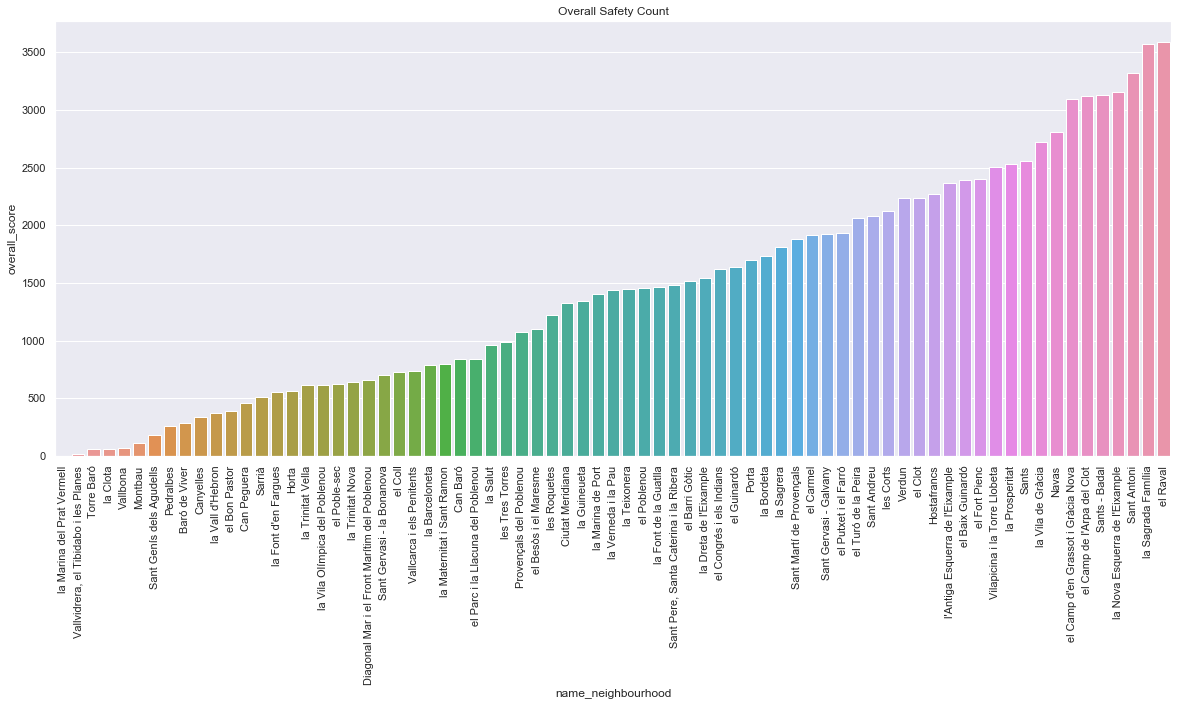

In [86]:
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='name_neighbourhood', ylabel='count')
ax.set_title("Overall Safety Count")
sns.barplot(ax = ax, x = 'name_neighbourhood', y = 'overall_score', data = merged_df.sort_values(by='overall_score'
                                                                                                ,ascending=True).dropna())
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\overall_safety_barrios.jpg",frameon=True);

In [87]:
#find z score for overall score - to normalize it further - standard deviations over mean score
merged_df.overall_score.mean()

1439.4710958904107

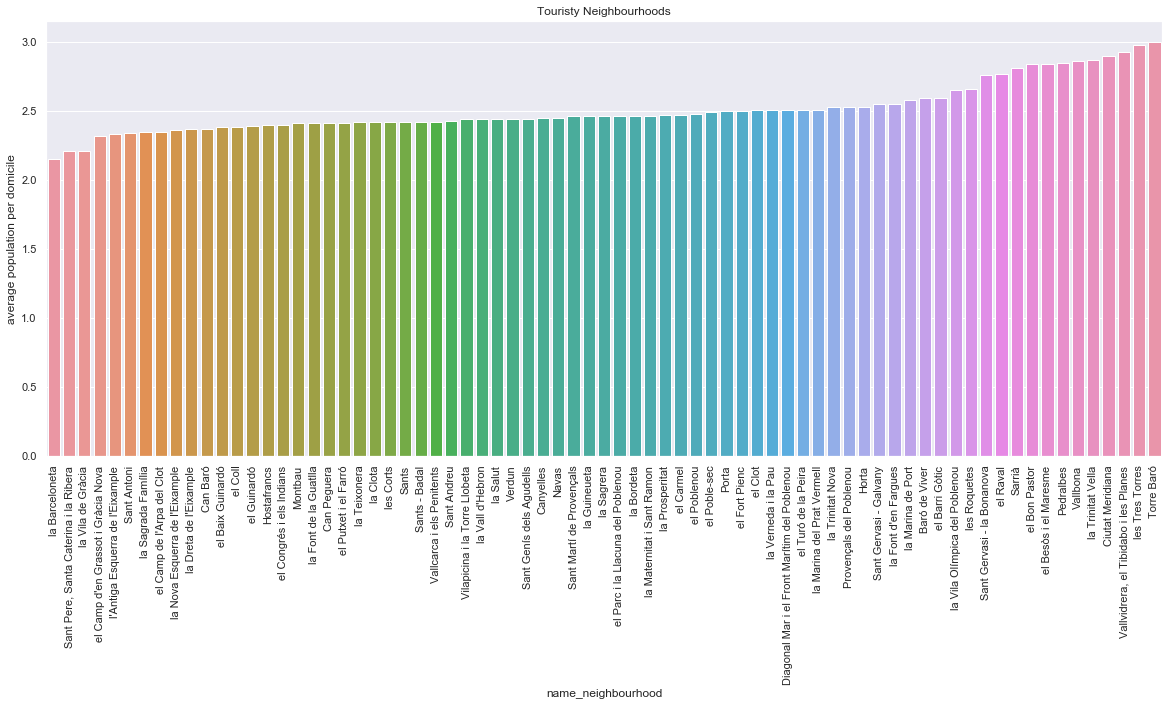

In [89]:
#to find the not so touristy neighborhoods
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='name_neighbourhood', ylabel='count')
ax.set_title("Touristy Neighbourhoods")
with sns.axes_style("dark"):
    sns.barplot(ax = ax, x = 'name_neighbourhood', y = 'average population per domicile', data = merged_df.sort_values(by='average population per domicile'
                                                                                                            ,ascending=True).dropna(),orient = "v")
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\Touristy Neighbourhoods.jpg",frameon=True);

#Should we consider less than 2.5 score as not touristy?(can these be defined as quite barrios?)

In [90]:
merged_df['zscore'] = (merged_df.overall_score - merged_df.overall_score.mean())/merged_df.overall_score.std(ddof=0)

merged_df.head()

,name_neighbourhood,high,low,medium,tot_score,population,domicile,average population per domicile,surface_area (ha),population/sa,overall_score,zscore
0,Baró de Viver,12,82,70,258,2535.0,977.0,2.59,23.0,110.217391,284.36,-1.195585
1,Can Baró,20,116,90,356,9071.0,3832.0,2.37,38.4,236.223958,840.96,-0.619482
2,Can Peguera,8,90,66,246,2229.0,925.0,2.41,12.0,185.750000,456.94,-1.016958
3,Canyelles,16,106,116,386,6885.0,2808.0,2.45,79.3,86.822194,335.13,-1.143036
4,Ciutat Meridiana,26,136,114,442,10622.0,3669.0,2.90,35.5,299.211268,1322.51,-0.121059


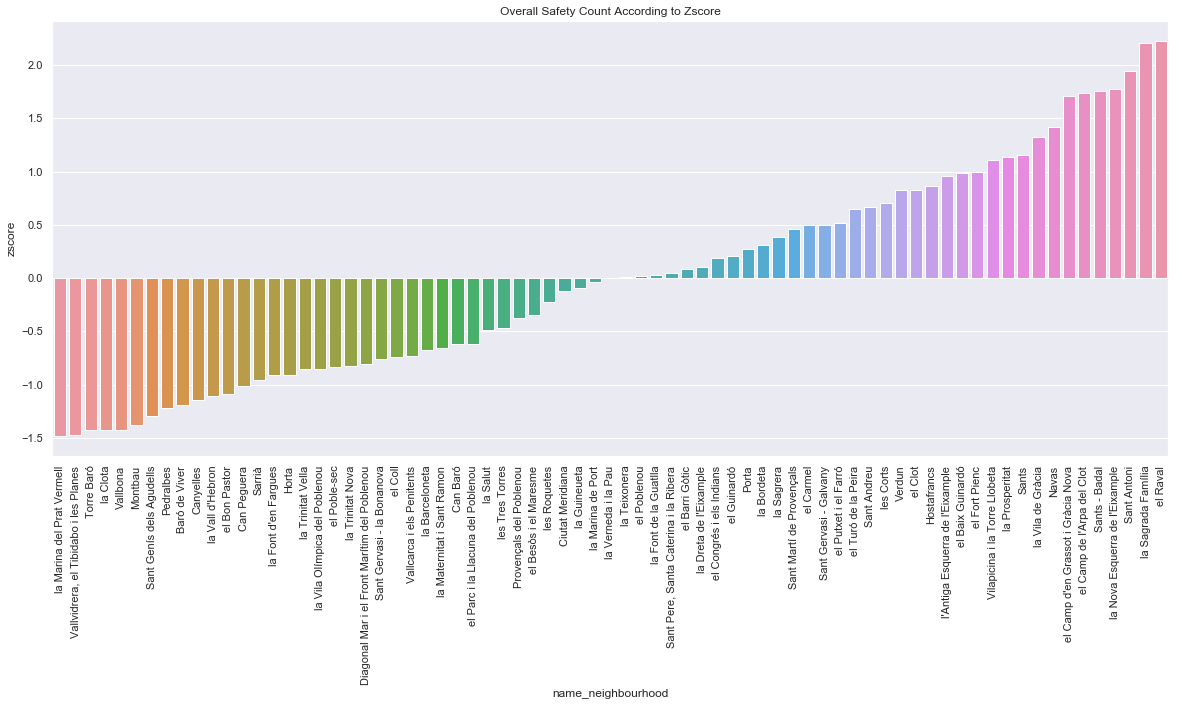

In [92]:
fig,ax = plt.subplots(figsize=(20,8))
ax.set(xlabel='name_neighbourhood', ylabel='count')
ax.set_title("Overall Safety Count According to Zscore")
sns.barplot(ax = ax, x = 'name_neighbourhood', y = 'zscore', data = merged_df.sort_values(by='zscore'
                                                                                                ,ascending=True).dropna())
plt.xticks(rotation=90)
plt.savefig("C:\\Users\\user\\Documents\\Project\\Overall Safety Count According to Zscore.jpg",frameon=True);

#negative values extremely safe?